# Intro to Python
Part of the SWEET Workshop series presented by the [IDEA Student Center at UC San Diego](http://www.jacobsschool.ucsd.edu/student/).

### Goals
- learn the basics of Python (the programming language)
- use Python to model an iPhone 6 bending
- use numpy to vectorize the bending calculation
- use matplotlib to visualize the bending

### Requirements
- python 2.7
- ipython-notebook
- numpy
- matplotlib

## 1) Basics of Python
Python is a very simple language, but can be very powerful. We'll first go over the basics of Python's syntax.

In [3]:
print "Hello World! UCSD"

Hello World! UCSD


In [5]:
# Python uses # to comment out lines
print "This line shows up. INDEED"

# print "But this line doesn't, since it is commented out by a # symbol"

This line shows up. INDEED


In [7]:
# assign a variables with =
x = 5
print x

5


In [18]:
# now try to create variables for common engineering-related constants:
# - pi
# - acceleration due to gravity (on Earth)
pi = 3.14159265359
g = 9.81

print "This is pi:",pi
print "This is the force of gravity on Earth:",g, "m/s^2"

This is pi: 3.14159265359
This is the force of gravity on Earth: 9.81 m/s^2


In [16]:
# math operations in Python are straightforward
#  + = addition
#  - = subtraction
#  * = multiplication
#  / = division
#  ** = raised to a power

print 4 * 2

8


In [25]:
# now try calculating some engineering-related things

# 1) the potential energy (PE) of a 2 kg bowling ball dropped 
# from the top of Jacobs Hall (recall that PE = m * g * h)

height = 60.0
mass = 2

potentialEnergy = height*mass*g
print potentialEnergy

# 2) the kinetic energy (KE) of F-16 fighter jet (~9100 kg) traveling
# at mach 2 (recall that KE = 1/2 * m * v^2)

massJet = 9100.0
mach2 = 686
kineticEnergy = massJet*1/2*mach2
print kineticEnergy

# 3) the Reynolds number (RE) of blood flowing through an artery,
# assuming:
#   - flow rate: 45 cm/s
#   - diameter: 0.4 cm
#   - kinematic viscosity = 3 x 10^-6 m^2/s
#
# HINT: make sure to convert everything to the same units

reynoldsNum = .45*.004*(1/(3*10**-6))
print reynoldsNum


1177.2
3121300.0
600.0


## 2) Plotting

In [34]:
# in order to plot anything, we need to load a plotting package

# this loads the plotting package ``matplotlib``
import matplotlib

# and to make the plots be displayed inside the iPython Notebook,
# we simply run the following line:
%matplotlib inline

# since we only need pyplot (the plotting part of matplotlib)
# we'll change our import call to only load ``pyplot``
import matplotlib.pyplot

# but typing "matplotlib.pyplot" over and over gets old fast,
# so we again define an alias
import matplotlib.pyplot as plt

# now whenever we write ``plt``, the code knows we actually
# mean ``matplotlib.pyplot``

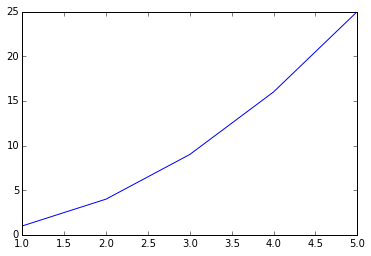

In [32]:
# we'll start with a simple line plot of y = x^2

# create the data to plot
#
# NOTE: the two variables must have the same number of elements
#
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# plot the data
plt.plot(x, y)

# show the plot
plt.show()

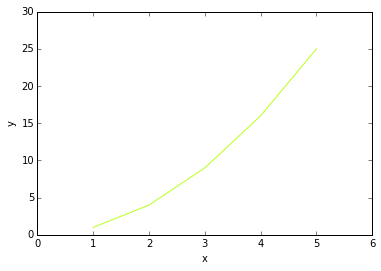

In [42]:
# let's create another simple plot, but this time we'll customize it

# create the data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# plot the data, but change the line color
plt.plot(x, y, color='#baff1e', linewidth = 1)

# add an x-axis label
plt.xlabel('x')
plt.xlim([0,6])

# change the y-axis range
plt.ylim([0, 30])
plt.ylabel('y')

# show the plot
plt.show()


# now try revising the plot as follows:
# - add a y-axis label
# - set the x-axis range to be from 0 to 6
# - change the line color
#

## 3) Example application: iPhone 6 bending
We are going to model the bending of an iPhone 6 by treating the 
iPhone 6 has a beam supported on two ends, with a force in its 
center. In this scenario, the deflection at the center ($\delta_c$)
can be calculated as:

$ \delta_c = \frac{F L^3}{48 E I}$ ,

where $F$ is the force at the center, $L$ is the length of the beam,
$E$ is the modulus of elasticity of the material, and $I$ is the 
area moment of inertia of the beam. Since the iPhone is basically
a rectangular beam, we can calculate $I$ as:

$ I = \frac{b h^3}{12}$ ,

where $b$ is the width of the beam and $h$ is the height (i.e. thickness).

In [46]:
# here's what our simplified model looks like
# (ignore what the code for now and just focus on the image)
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/1/10/Beam_bending.png', width=300)

### 3.1) Estimate material properties of the iPhone
Although the iPhone 6 is made up of multiple materials (aluminum, 
glass, etc.), each with different values of $E$, we can simplify
our problem by treating the iPhone as if it is made of a single
material with some unknown $E$. Then we can use reported bending
results to estimate $E$.

From the [Apple website](https://www.apple.com/iphone-6/specs/), 
the iPhone 6 is 138.1mm long, 67.0mm wide, and 6.9mm thick. And 
reports indicate that the iPhone 6 bends ~1cm under ~70 lbs of 
force (~311 N).

In [48]:
# use the information above to calculate the moment of 
# intertia (I) for the iPhone 6 in units of [m^4]

width = .067
thickness = 0.0069
intertia = (width*(thickness**3))/12.0

In [49]:
# now calculate the modulus of elasticity (E) of the
# iPhone in units of [N/m^2]

force = 311
length = 0.1381
deflection = 0.01
modulusElasticity = (force*(length**3))/(48*intertia*deflection)

print modulusElasticity

930377841.77


In [ ]:
# compare your estimated value of E to other common materials
# (e.g. 1060 Aluminum)


### 3.2) Model the iPhone bending under a range of forces
The next logical step in this analysis is to calculate the deflection of the iPhone under a range of forces. To do this, we are going to vectorize our calculations using the numpy package.

In [ ]:
# in Python, you have to explicitly state which packages you want
# to use via the "import" command
import numpy

# test that numpy loaded properly by using one of numpy's functions
print numpy.pi

# cos(0) = 1
print numpy.cos(0)

# sin(pi/2) = 1


In [ ]:
# because writing "numpy" over and over gets tiring, we
# can assign a shorter name to refer to "numpy"
import numpy as np

print np.pi

# try calling other numpy functions

In [ ]:
# to create a vector of values, using numpy's arange() function:
#
# array = numpy.arange(minimum, maximum, step change)
print numpy.arange(0.0, 5, 1.0)

In [ ]:
# now try some vectorized calculations

# create a vector and square all the values


# calculate the mean value of a vector using numpy's mean() function:
#
# mean = np.mean(some_vector)


# numpy has functions for other common operations, e.g., sum, 
# max, min, and standard deviation


In [ ]:
# now let's apply what we've learned to modeling the
# iPhone 6 bending

# again, calculate the area moment of intertia [m^2] of the iPhone,
# making sure to keep the units consistent (e.g. all dimensions in [m], not [mm])


# create a vector with a range of forces [N] to test


# calculate the deflection [m] of the iPhone for the range of
# forces


### 3.3) Plotting the deflection vs. force
Now let's visualize how the force affects the deflection of the iPhone. We'll use matplotlib to plot the force vs. the deflection.

In [ ]:
# NOTE: we already have the plotting package ``matplotlib`` loaded, but
# for reference:

# load the plotting library with ``plt`` as an alias
import matplotlib.pyplot as plt

# make the plots be displayed inside the iPython Notebook
%matplotlib inline

In [ ]:
# generate two vectors to plot, e.g.,
# - x = 0 to 2*pi
# - y = sin(x)
#x =
#y =

# plot the data
#plt.plot(x, y)

# add labels to the x-axis and y-axis using plt.xlabel() and plt.ylabel()

In [ ]:
# now let's plot the force vs. deflection vectors that you
# calculated in the previous section

# plot the vectors


# add axes labels


In [ ]:
# matplotlib has many options for customizing plots, so let's try them out:

# change the line color to red:
# - plt.plot(x, y, color='red')

# change the line color to a custom color
# - '#6c71c4' is the hex code for a purple/violet color
# - plt.plot(x, y, color='#6c71c4')

# change the line thickness
# - plt.plot(x, y, linewidth=2)

# change the line style (solid, dashed, dotted)
# - plt.plot(x, y, linestyle='--')
# - plt.plot(x, y, linestyle='-.')
# - plt.plot(x, y, linestyle=':')

### 3.4) Extra: compare multiple materials
Compare how much the iPhone would bend if it were made out of other materials (e.g. steel or titanium).

1. look up the modulus of elasticity ($E$) for the different materials
2. calculate the deflection for each material
3. plot the deflection vs. force for the multiple materials

In [ ]:
# calculate deflection for the different materials


In [ ]:
# plot the deflections for the materials (on the same plot
# so you can compare)
